In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Downloads/StarClassification-Sheet1.csv', index_col = 0)
data.head()

,Star,Wavelength(nm) (Max. Int. of vis. spec.),Temp(K) (Wiens) (parameter 1),T,Radius (Solar Radius),L,Classification (classification output),C,Unnamed: 9,Unnamed: 10
S.No.,,,,,,,,,,
1,Vega,400.0,7245.0,9602,2.632,52.833384,Main Sequence,0,NaN,main sequence = 0
2,Mu Cephei,600.0,4830.0,3690,1260.000,264080.543300,red supergaint,1,NaN,giants/supergiants = 1
3,polaris A,NaN,NaN,6015,50.300,2971.449452,white supergaint,1,NaN,dwarfs = -1
4,polaris Ab,NaN,NaN,6900,1.040,2.199646,white dwarf,-1,NaN,NaN
5,polaris B,NaN,NaN,6900,1.380,3.872972,white dwarf,-1,NaN,Training data : 20


In [3]:
feature_cols = ['T', 'L']
X = data[feature_cols]
X.head() 

,T,L
S.No.,,
1,9602,52.833384
2,3690,264080.543300
3,6015,2971.449452
4,6900,2.199646
5,6900,3.872972


In [4]:
y = data['C']
y.head()

S.No.
1    0
2    1
3    1
4   -1
5   -1
Name: C, dtype: int64

In [5]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(28,)


In [6]:
import seaborn as sns

In [7]:
%matplotlib inline

/home/deathstar/env/lib/python3.5/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/deathstar/env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


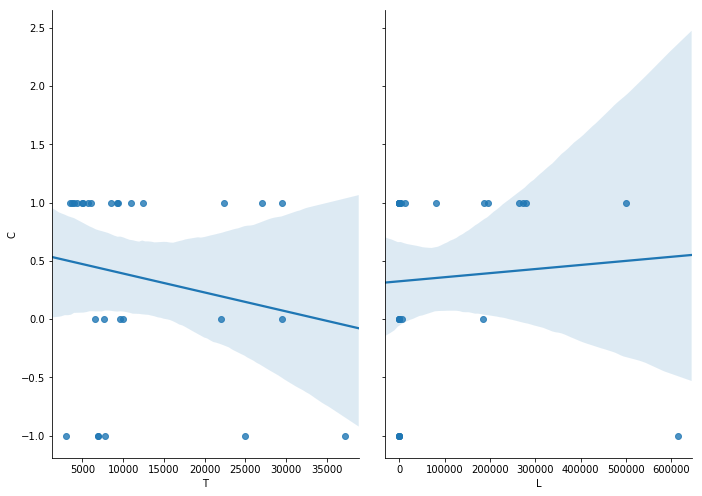

In [8]:
sns.pairplot(data, x_vars = ['T', 'L'], y_vars = 'C', size = 7, aspect = 0.7, kind ='reg')

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 8, random_state = 30)

In [75]:
X_train.head()

,T,L
S.No.,,
24,4000,444.667274
5,6900,3.872972
12,4970,78.827526
22,27000,500535.548600
19,5086,67.453891


In [76]:
X_test.head()

,T,L
S.No.,,
16,11000,79918.954900
27,6530,6.788955
25,22400,12369.306830
11,4290,196.058850
23,22000,6948.903212


In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
logreg = LogisticRegression(C=1e5, multi_class='multinomial',solver ='newton-cg')
logreg.fit(X_train, y_train)

/home/deathstar/env/lib/python3.5/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [79]:
y_pred = logreg.predict(X_test)
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.9354143466934853


In [80]:
y_pred

array([ 1,  1,  0,  1,  0,  1,  1, -1])

In [81]:
y_test

S.No.
16    1
27    0
25    1
11    1
23    0
1     0
9    -1
7    -1
Name: C, dtype: int64

In [82]:
y_train


S.No.
24    1
5    -1
12    1
22    1
19    1
20    0
2     1
17    0
8     1
10   -1
4    -1
15    1
18    1
3     1
13    1
21    1
26    1
14    1
28   -1
6     0
Name: C, dtype: int64

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5